In [1]:
import numpy as np
import pandas as pd
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
#age_median = train_data["Age"].median()
#train_data["Age"].fillna(age_median, inplace = True)
train_data["Cabin"].fillna("Unknown",inplace = True)
train_data["Embarked"].fillna("S",inplace = True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
import re
Cabin_list = []
cabin = []
regex = '(\D)[\d+| ]'
for i in range(train_data["Cabin"].shape[0]):
    if re.findall(regex, train_data.loc[i,"Cabin"]) not in Cabin_list:
        Cabin_list.append(re.findall(regex, train_data.loc[i,"Cabin"]))
    cabin.append(re.findall(regex, train_data.loc[i,"Cabin"]))
train_data['Cabin'] = cabin
train_data['Cabin']=train_data['Cabin'].apply(tuple)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,(),S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,"(C,)",C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,(),S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,"(C,)",S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,(),S


In [5]:
import re
regex = ' (\S+)\.'
title = []
for i in range(train_data["Name"].shape[0]):
    title.append(re.findall(regex, train_data.loc[i,"Name"])[0])
train_data['Title'] = title
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,(),S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,"(C,)",C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,(),S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,"(C,)",S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,(),S,Mr


In [6]:
train_data["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Mme           1
Countess      1
Sir           1
Jonkheer      1
Capt          1
Ms            1
Lady          1
Name: Title, dtype: int64

In [7]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col','Sir']:
        return 'Mr'
    elif title in ['Countess', 'Mme', 'Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms', 'Lady']:
        return 'Miss'
    else:
        return title
train_data['Title']=train_data.apply(replace_titles, axis=1)
train_data["Title"].value_counts()

Mr        531
Miss      186
Mrs       127
Master     40
Dr          7
Name: Title, dtype: int64

In [9]:
train_data["Cabin"].value_counts()

()              691
(C,)             51
(B,)             36
(E,)             32
(D,)             29
(A,)             15
(F,)              9
(B, B)            7
(C, C)            4
(C, C, C)         4
(G,)              4
(F, G)            3
(B, B, B, B)      2
(B, B, B)         2
(F, E)            1
(D, D)            1
Name: Cabin, dtype: int64

In [10]:
import re
regex = '(.+) \d+'
ticket_list = []
ticket = []
for i in range(train_data["Ticket"].shape[0]):
    if len(re.findall(regex, train_data.loc[i,"Ticket"]))!=0:
        if re.findall(regex, train_data.loc[i,"Ticket"]) not in ticket_list:
            ticket_list.append(re.findall(regex, train_data.loc[i,"Ticket"]))
        ticket.append(re.findall(regex, train_data.loc[i,"Ticket"])[0])
    else:
        ticket.append("None")
train_data["Ticket"] = ticket
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5,7.2500,(),S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC,71.2833,"(C,)",C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2.,7.9250,(),S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,None,53.1000,"(C,)",S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,None,8.0500,(),S,Mr


In [11]:
train_data["Ticket"].value_counts()

None           665
PC              60
C.A.            27
STON/O 2.       12
A/5             10
W./C.            9
CA.              8
SOTON/O.Q.       8
A/5.             7
SOTON/OQ         7
STON/O2.         6
CA               6
SC/PARIS         5
C                5
S.O.C.           5
F.C.C.           5
SC/Paris         4
PP               3
A/4.             3
S.O./P.P.        3
A/4              3
A./5.            2
P/PP             2
WE/P             2
SOTON/O2         2
A.5.             2
S.C./PARIS       2
SC/AH            2
A4.              1
A/S              1
C.A./SOTON       1
S.O.P.           1
Fa               1
S.W./PP          1
F.C.             1
SCO/W            1
W.E.P.           1
S.C./A.4.        1
SO/C             1
SW/PP            1
SC               1
SC/AH Basle      1
S.P.             1
W/C              1
Name: Ticket, dtype: int64

In [12]:
def replace_ticket(x):
    ticket=x['Ticket']
    if ticket in ['A/5.', 'A.5.', 'A./5.']:
        return 'A/5'
    elif ticket in ['CA.', 'C.A./SOTON', 'C.A.']:
        return 'CA'
    elif ticket in ['A/4.', 'A4.']:
        return 'A/4'
    elif ticket in ['SOTON/O.Q.']:
        return 'SOTON/OQ'
    elif ticket in ['SC/AH Basle', 'S.C./A.4.', 'SC/AH', 'SC/PARIS' ,'S.C./PARIS','SC/Paris']:
        return 'SC'
    elif ticket in ['S.W./PP','SW/PP','P/PP','S.O./P.P.']:
        return 'PP'
    elif ticket in ['STON/O 2']:
        return 'STON/O2.'
    elif ticket in ['SO/C']:
        return 'S.O.C.'
    elif ticket in ['F.C.']:
        return 'F.C.C.'
    elif ticket in ['W.E.P.']:
        return 'WE/P'
    elif ticket in ['W/C']:
        return 'W./C.'
    else:
        return ticket
train_data['Ticket']=train_data.apply(replace_ticket, axis=1)
train_data["Ticket"].value_counts()

None         665
PC            60
CA            42
A/5           21
SC            16
SOTON/OQ      15
STON/O 2.     12
PP            10
W./C.         10
A/4            7
STON/O2.       6
S.O.C.         6
F.C.C.         6
C              5
WE/P           3
SOTON/O2       2
S.P.           1
A/S            1
Fa             1
SCO/W          1
S.O.P.         1
Name: Ticket, dtype: int64

In [13]:
train_data.drop(["Name","PassengerId"], axis=1, inplace = True)

In [14]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
train_data[["Sex","Cabin","Embarked","Title","Ticket"]] = oe.fit_transform(train_data[["Sex","Cabin","Embarked","Title","Ticket"]])
train_data = pd.DataFrame(train_data)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,1.0,22.0,1,0,1.0,7.2500,0.0,2.0,3.0
1,1,1,0.0,38.0,1,0,8.0,71.2833,6.0,0.0,4.0
2,1,3,0.0,26.0,0,0,18.0,7.9250,0.0,2.0,2.0
3,1,1,0.0,35.0,1,0,7.0,53.1000,6.0,2.0,4.0
4,0,3,1.0,35.0,0,0,7.0,8.0500,0.0,2.0,3.0


In [15]:
train_data['Family_Size']=train_data['SibSp']+train_data['Parch']
train_data["Fare Average"] = train_data["Fare"]/(train_data['Family_Size']+1)

In [16]:
X = train_data.drop(["Survived"], axis = 1)
y = train_data["Survived"]

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)
X = pd.DataFrame(ss.transform(X), columns = X.columns)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Fare Average
0,0.827377,0.737695,-0.530377,0.432793,-0.473674,-2.211217,-0.502445,-0.451492,0.585954,0.237992,0.059160,-0.454798
1,-1.566107,-1.355574,0.571831,0.432793,-0.473674,0.202814,0.786845,1.352453,-1.942303,1.563310,0.059160,0.438994
2,0.827377,-1.355574,-0.254825,-0.474545,-0.473674,3.651430,-0.488854,-0.451492,0.585954,-1.087326,-0.560975,-0.334757
3,-1.566107,-1.355574,0.365167,0.432793,-0.473674,-0.142047,0.420730,1.352453,0.585954,1.563310,0.059160,0.185187
4,0.827377,0.737695,0.365167,-0.474545,-0.473674,-0.142047,-0.486337,-0.451492,0.585954,0.237992,-0.560975,-0.331267


(array([ 61.,  53., 208., 244., 148.,  92.,  49.,  25.,   9.,   2.]),
 array([-2.01697919, -1.46876867, -0.92055814, -0.37234762,  0.1758629 ,
         0.72407342,  1.27228395,  1.82049447,  2.36870499,  2.91691551,
         3.46512604]),
 <a list of 10 Patch objects>)

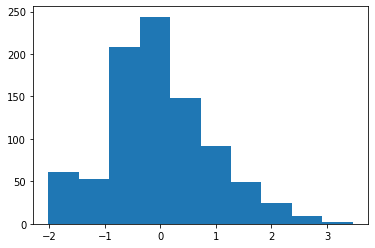

In [66]:
import matplotlib.pyplot as plt
plt.hist(X["Age"])

In [19]:
age_data = X[np.isnan(X["Age"])==False]
age_pred_data = X[np.isnan(X["Age"])].drop(["Age"], axis = 1)
age_X = age_data.drop(["Age"], axis = 1)
age_y = age_data["Age"]
age_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 11 columns):
Pclass          714 non-null float64
Sex             714 non-null float64
SibSp           714 non-null float64
Parch           714 non-null float64
Ticket          714 non-null float64
Fare            714 non-null float64
Cabin           714 non-null float64
Embarked        714 non-null float64
Title           714 non-null float64
Family_Size     714 non-null float64
Fare Average    714 non-null float64
dtypes: float64(11)
memory usage: 66.9 KB


In [20]:
age_y.head()

0   -0.530377
1    0.571831
2   -0.254825
3    0.365167
4    0.365167
Name: Age, dtype: float64

In [21]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(age_X, age_y)
forest_reg.score(age_X, age_y)

0.7708365490891271

(array([ 7.,  3., 14., 32., 49., 32., 17., 18.,  3.,  2.]),
 array([-1.78431005, -1.41922788, -1.05414571, -0.68906354, -0.32398137,
         0.0411008 ,  0.40618296,  0.77126513,  1.1363473 ,  1.50142947,
         1.86651164]),
 <a list of 10 Patch objects>)

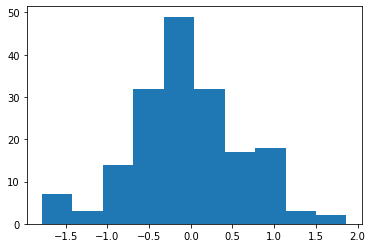

In [22]:
age_pred = forest_reg.predict(age_pred_data)
plt.hist(age_pred)

In [23]:
X["Age"][np.isnan(X["Age"])]= age_pred

(array([ 61.,  53., 208., 244., 148.,  92.,  49.,  25.,   9.,   2.]),
 array([-2.01697919, -1.46876867, -0.92055814, -0.37234762,  0.1758629 ,
         0.72407342,  1.27228395,  1.82049447,  2.36870499,  2.91691551,
         3.46512604]),
 <a list of 10 Patch objects>)

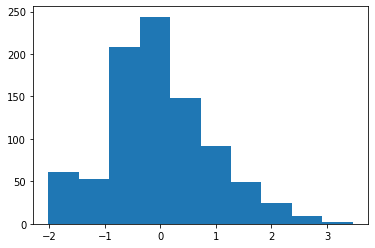

In [24]:
plt.hist(X["Age"])

In [25]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Pclass          891 non-null float64
Sex             891 non-null float64
Age             891 non-null float64
SibSp           891 non-null float64
Parch           891 non-null float64
Ticket          891 non-null float64
Fare            891 non-null float64
Cabin           891 non-null float64
Embarked        891 non-null float64
Title           891 non-null float64
Family_Size     891 non-null float64
Fare Average    891 non-null float64
dtypes: float64(12)
memory usage: 83.6 KB


In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

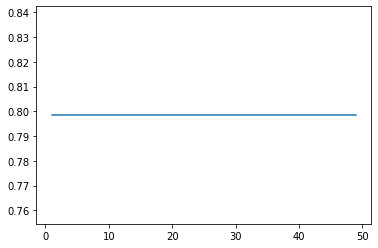

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
result = []
for i in range(1,50):
    log_reg = LogisticRegression(random_state = 0,C = i/5)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
plt.plot([i for i in range(1,50)],result)
plt.show()

In [118]:
log_reg = LogisticRegression(random_state = 0,C = 4)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
fl = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("LogisticRegression: ",acc,fl,prec,recall)

LogisticRegression:  0.7985074626865671 0.7326732673267325 0.7956989247311828 0.6788990825688074


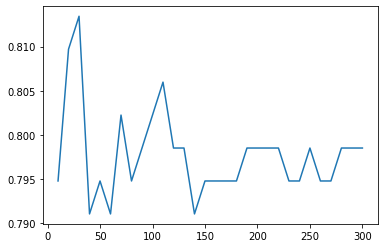

In [119]:
from sklearn.ensemble import RandomForestClassifier
result = []
for i in range(10,301,10):
    rfc = RandomForestClassifier(random_state = 0,n_estimators = i)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
plt.plot([i for i in range(10,301,10)],result)
plt.show()

In [120]:
rfc = RandomForestClassifier(random_state = 0,n_estimators = 100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
fl = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("RandomForestClassifier:",acc,fl,prec,recall)

RandomForestClassifier: 0.8022388059701493 0.7534883720930232 0.7641509433962265 0.7431192660550459


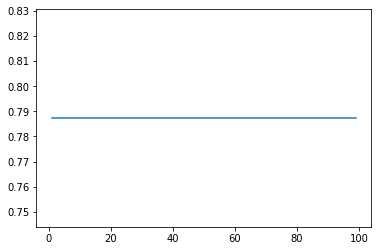

In [121]:
from sklearn.svm import SVC
result = []
for i in range(1,100):
    svc_lin = SVC(random_state = 0,kernel = 'linear',C = i/5)
    svc_lin.fit(X_train, y_train)
    y_pred = svc_lin.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
plt.plot([i for i in range(1,100)],result)
plt.show()

In [122]:
from sklearn.svm import SVC
svc_lin = SVC(random_state = 0,kernel = 'linear')
svc_lin.fit(X_train, y_train)
y_pred = svc_lin.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("SVC(linear):",acc,fl,prec,recall)

SVC(linear): 0.7873134328358209 0.7534883720930232 0.782608695652174 0.6605504587155964


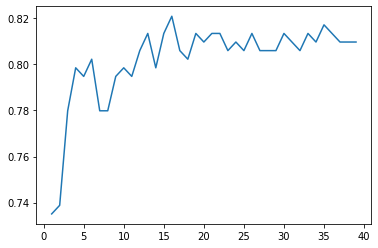

In [123]:
from sklearn.neighbors import KNeighborsClassifier
result = []
for i in range(1,40):
    knc =  KNeighborsClassifier(n_neighbors = i)
    knc.fit(X_train, y_train)
    y_pred = knc.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
plt.plot([i for i in range(1,40)],result)
plt.show()

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=30)
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("KNeighbors:",acc,fl,prec,recall)

KNeighbors: 0.8134328358208955 0.7534883720930232 0.8105263157894737 0.7064220183486238


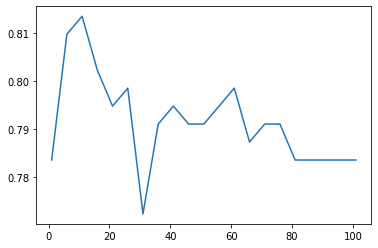

In [125]:
from sklearn.ensemble import ExtraTreesClassifier
result = []
for i in range(1,102,5):
    etc = ExtraTreesClassifier(random_state=0,n_estimators=i)
    etc.fit(X_train, y_train)
    y_pred = etc.predict(X_test)
    result.append(accuracy_score(y_test, y_pred))
plt.plot([i for i in range(1,102,5)],result)
plt.show()

In [126]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(X_train, y_train)
acc = accuracy_score(y_test, y_pred)
y_pred = etc.predict(X_test)

prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("ExtraTrees:",acc,fl,prec,recall)

ExtraTrees: 0.7835820895522388 0.7534883720930232 0.7339449541284404 0.7339449541284404


In [127]:
estimators = [
  ('rfc', RandomForestClassifier(n_estimators=100)),
    ('log_reg', LogisticRegression(C = 4)),
    ('svc_lin', SVC(kernel = 'linear')),
    ('knc', KNeighborsClassifier(n_neighbors=30)),
    ('etc', ExtraTreesClassifier(n_estimators=100))]

In [156]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(C = 4),cv = 5)
clf.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
fl = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Model Stacking:",acc,fl,prec,recall)

Model Stacking: 0.9514925373134329 0.934010152284264 0.9583333333333334 0.9108910891089109


In [89]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(C = 4),cv = 5)
clf.fit(X, y)
y_pred = rfc.predict(X)

acc = accuracy_score(y, y_pred)
fl = f1_score(y, y_pred)
prec = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

print("Model Stacking:",acc,fl,prec,recall)

Model Stacking: 0.9450056116722784 0.9256449165402124 0.9621451104100947 0.8918128654970761


In [157]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [158]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [159]:
test_data["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [160]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [161]:
#age_median = test_data["Age"].median()
test_data["Cabin"].fillna("Unknown",inplace = True)
test_data["Embarked"].fillna("S",inplace = True)
fare_median = test_data["Fare"].median()
test_data["Fare"].fillna(fare_median,inplace = True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [162]:
test_data["Cabin"].value_counts()

Unknown            327
B57 B59 B63 B66      3
C101                 2
F4                   2
C6                   2
C55 C57              2
C89                  2
B45                  2
E34                  2
C31                  2
C80                  2
A34                  2
C78                  2
C23 C25 C27          2
C116                 2
G6                   1
C86                  1
C53                  1
C132                 1
D34                  1
F                    1
D40                  1
D30                  1
D37                  1
D19                  1
B61                  1
D                    1
B36                  1
B69                  1
C97                  1
                  ... 
F E57                1
F33                  1
C85                  1
D10 D12              1
C22 C26              1
A29                  1
C28                  1
E31                  1
F G63                1
B58 B60              1
A21                  1
B10                  1
B78        

In [163]:
import re
cabin = []
regex = '(\D)[\d+| ]'
for i in range(test_data["Cabin"].shape[0]):
    if re.findall(regex, test_data.loc[i,"Cabin"]) not in Cabin_list:
        cabin.append([])
    else:
        cabin.append(re.findall(regex, test_data.loc[i,"Cabin"]))
test_data['Cabin'] = cabin
test_data['Cabin']=test_data['Cabin'].apply(tuple)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,(),Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,(),S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,(),Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,(),S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,(),S


In [164]:
test_data["Cabin"].value_counts()

()              330
(C,)             29
(B,)             12
(D,)             11
(E,)              8
(A,)              7
(C, C)            4
(F,)              4
(B, B, B, B)      3
(F, E)            2
(C, C, C)         2
(B, B, B)         2
(D, D)            1
(F, G)            1
(B, B)            1
(G,)              1
Name: Cabin, dtype: int64

In [165]:
import re
regex = ' (\S+)\.'
title = []
for i in range(test_data["Name"].shape[0]):
    title.append(re.findall(regex, test_data.loc[i,"Name"])[0])
test_data["Title"] = title
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,(),Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,(),S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,(),Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,(),S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,(),S,Mrs


In [166]:
test_data['Title']=test_data.apply(replace_titles, axis=1)
test_data["Title"].value_counts()

Mr        244
Miss       79
Mrs        73
Master     21
Dr          1
Name: Title, dtype: int64

In [167]:
import re
regex = '(.+) \d+'
ticket = []
for i in range(test_data["Ticket"].shape[0]):
    if len(re.findall(regex, test_data.loc[i,"Ticket"]))!=0:
        if re.findall(regex, test_data.loc[i,"Ticket"]) not in ticket_list:
            ticket.append("None")
        else:
            ticket.append(re.findall(regex, test_data.loc[i,"Ticket"])[0])
    else:
        ticket.append("None")
test_data["Ticket"] = ticket
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,None,7.8292,(),Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,None,7.0000,(),S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,None,9.6875,(),Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,None,8.6625,(),S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,None,12.2875,(),S,Mrs


In [168]:
test_data['Ticket']=test_data.apply(replace_ticket, axis=1)
test_data["Ticket"].value_counts()

None         303
PC            32
CA            27
SC            11
SOTON/OQ       9
A/5            7
F.C.C.         6
W./C.          5
PP             5
C              3
A/4            3
S.O.C.         2
STON/O 2.      2
STON/O2.       1
SOTON/O2       1
WE/P           1
Name: Ticket, dtype: int64

In [169]:
test_data.drop(["Name","PassengerId"], axis=1, inplace = True)

In [170]:
test_data[["Sex","Cabin","Embarked","Title","Ticket"]] = oe.transform(test_data[["Sex","Cabin","Embarked","Title","Ticket"]])
test_data = pd.DataFrame(test_data)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,1.0,34.5,0,0,7.0,7.8292,0.0,1.0,3.0
1,3,0.0,47.0,1,0,7.0,7.0000,0.0,2.0,4.0
2,2,1.0,62.0,0,0,7.0,9.6875,0.0,1.0,3.0
3,3,1.0,27.0,0,0,7.0,8.6625,0.0,2.0,3.0
4,3,0.0,22.0,1,1,7.0,12.2875,0.0,2.0,4.0


In [171]:
test_data['Family_Size']=test_data['SibSp']+test_data['Parch']
test_data["Fare Average"] = test_data["Fare"]/(test_data['Family_Size']+1)

In [172]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(test_data)
test_data = pd.DataFrame(ss.transform(test_data), columns = test_data.columns)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Fare Average
0,0.873482,0.755929,0.298549,-0.499470,-0.400248,-0.121391,-0.497413,-0.442364,-0.470915,0.161430,-0.553443,-0.392544
1,0.873482,-1.322876,1.181328,0.616992,-0.400248,-0.121391,-0.512278,-0.442364,0.700767,1.484527,0.105643,-0.514300
2,-0.315819,0.755929,2.240662,-0.499470,-0.400248,-0.121391,-0.464100,-0.442364,-0.470915,0.161430,-0.553443,-0.340280
3,0.873482,0.755929,-0.231118,-0.499470,-0.400248,-0.121391,-0.482475,-0.442364,0.700767,0.161430,-0.553443,-0.369108
4,0.873482,-1.322876,-0.584229,0.616992,0.619896,-0.121391,-0.417492,-0.442364,0.700767,1.484527,0.764728,-0.497543


D:\Users\Administrator\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Users\Administrator\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
 array([-2.12591379, -1.59038498, -1.05485618, -0.51932737,  0.01620143,
         0.55173024,  1.08725904,  1.62278785,  2.15831666,  2.69384546,
         3.22937427]),
 <a list of 10 Patch objects>)

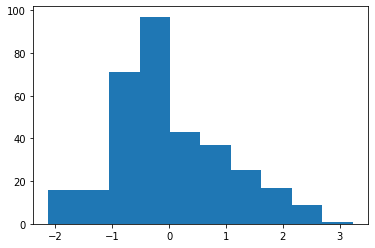

In [173]:
plt.hist(test_data["Age"])

(array([ 2.,  1., 13.,  7., 21., 25.,  7.,  3.,  5.,  2.]),
 array([-1.76841455, -1.41918404, -1.06995352, -0.72072301, -0.3714925 ,
        -0.02226199,  0.32696852,  0.67619903,  1.02542954,  1.37466005,
         1.72389056]),
 <a list of 10 Patch objects>)

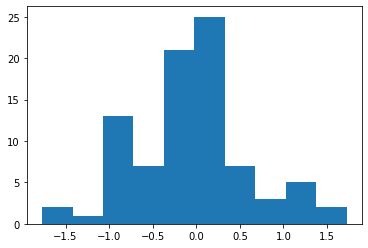

In [174]:
age_data = test_data[np.isnan(test_data["Age"])==False]
age_pred_data = test_data[np.isnan(test_data["Age"])].drop(["Age"], axis = 1)
age_X = age_data.drop(["Age"], axis = 1)
age_y = age_data["Age"]
age_pred = forest_reg.predict(age_pred_data)
plt.hist(age_pred)

(array([ 18.,  18.,  86., 137.,  59.,  42.,  29.,  19.,   9.,   1.]),
 array([-2.12591379, -1.59038498, -1.05485618, -0.51932737,  0.01620143,
         0.55173024,  1.08725904,  1.62278785,  2.15831666,  2.69384546,
         3.22937427]),
 <a list of 10 Patch objects>)

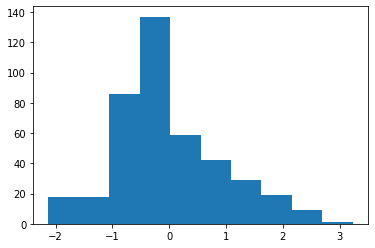

In [175]:
test_data["Age"][np.isnan(test_data["Age"])]= age_pred
plt.hist(test_data["Age"])

In [176]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Pclass          418 non-null float64
Sex             418 non-null float64
Age             418 non-null float64
SibSp           418 non-null float64
Parch           418 non-null float64
Ticket          418 non-null float64
Fare            418 non-null float64
Cabin           418 non-null float64
Embarked        418 non-null float64
Title           418 non-null float64
Family_Size     418 non-null float64
Fare Average    418 non-null float64
dtypes: float64(12)
memory usage: 39.3 KB


In [177]:
pred  = clf.predict(test_data)

In [178]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [179]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [180]:
result = test_data["PassengerId"]
result = pd.DataFrame(result)
result.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [181]:
result["Survived"] = pred
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [182]:
result.to_csv("titanic_submission.csv",index = False)